
#### Decision Tree on CIFAR data

1. used sklearn.DecisionTreeClassifier 
2. tuned max_depth, min_samples_split, min_samples_leaf, max_features separately
3. used plotly to view performance
4. learnt roc_curve is not for multinomial classification
5. the best accuracy achieved is 0.27
6. nice plotly interactive figure won't show in github





In [6]:

# Run some setup code for this notebook.

import random
import time
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# plotly for interactive plot 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='zpeace', api_key='Ud1d1Lf6Wm5IETvwmyMJ')

from sklearn.tree import DecisionTreeClassifier

from data.data_utils import load_CIFAR10

# inline figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2


In [4]:

# Load the raw CIFAR-10 data.
cifar10_dir = 'data/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


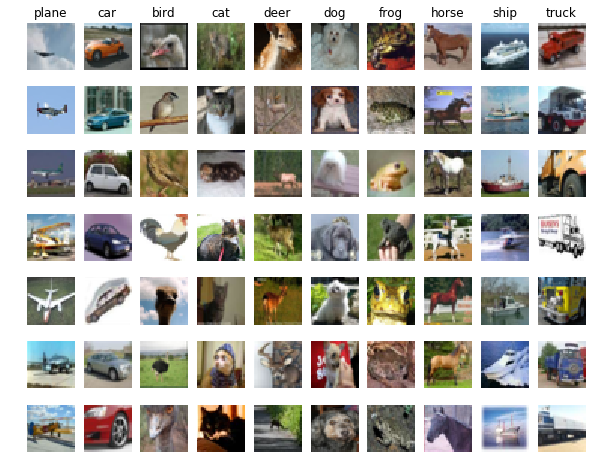

In [7]:

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [9]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
print(X_train.shape)
num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]


(5000, 32, 32, 3)


In [10]:

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)


(5000, 3072) (500, 3072)


In [11]:
### train and test error

cifar_model = DecisionTreeClassifier(random_state = 1)
cifar_model.fit(X_train, y_train)

print(y_train[:20])
print(cifar_model.predict(X_train[:20,:]))

y_train_pred = cifar_model.predict(X_train)
y_test_pred = cifar_model.predict(X_test)

# train error
num_correct = np.sum(y_train_pred == y_train)
accuracy = float(num_correct)/num_training
print(f"Got {num_correct} / {num_training} correct => accuracy {accuracy}")

# test error

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print(f"Got {num_correct} / {num_test} correct => accuracy {accuracy}")



[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
Got 5000 / 5000 correct => accuracy 1.0
Got 99 / 500 correct => accuracy 0.198


In [12]:
from sklearn.metrics import roc_curve, auc

### Aha, roc does not work on multiclass classification. How would you define 'positive'?
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

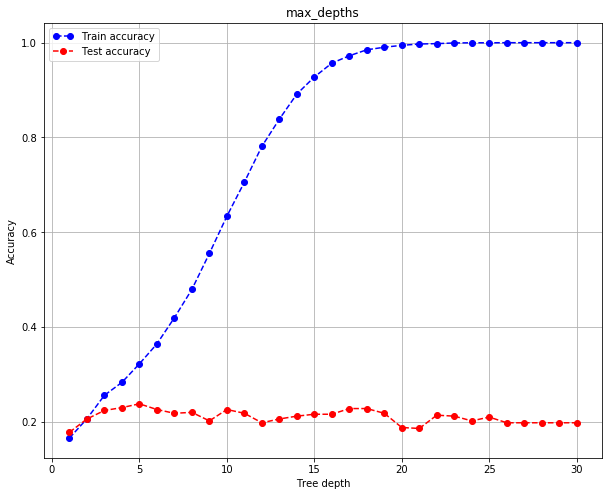

In [17]:
### tunning max_depths

start = time.time()

max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    cifar_model = DecisionTreeClassifier(random_state = 1, max_depth = max_depth)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)
    
end = time.time()
print(f"time spent: {end - start}")

line1, = plt.plot(max_depths, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(max_depths, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.grid(True)
plt.title('max_depths')
plt.show()



### plotly won't show in github
# trace1 = go.Scatter(
#     x = max_depths,
#     y = train_results,
#     mode = 'lines+markers',
#     name = 'train accuracy'
# )

# trace2 = go.Scatter(
#     x = max_depths,
#     y = test_results,
#     mode = 'lines+markers',
#     name = 'test accuracy'
# )
# data = [trace1, trace2]


# layout = go.Layout(
#     title='min_samples_splits'
# )


# data = [trace1, trace2]
# layout = go.Layout(title='max_depths')
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='max_depths')

time spent: 15.157977104187012


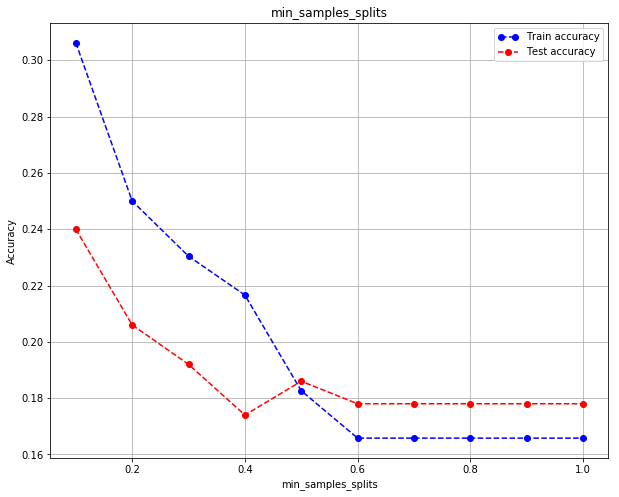

In [18]:
# tunning min_samples_splits

start = time.time()

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    cifar_model = DecisionTreeClassifier(random_state = 1, min_samples_split = min_samples_split)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

end = time.time()
print(f"time spent: {end - start}")

line1, = plt.plot(min_samples_splits, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(min_samples_splits, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.grid(True)
plt.title('min_samples_splits')
plt.show()

time spent: 49.034751176834106


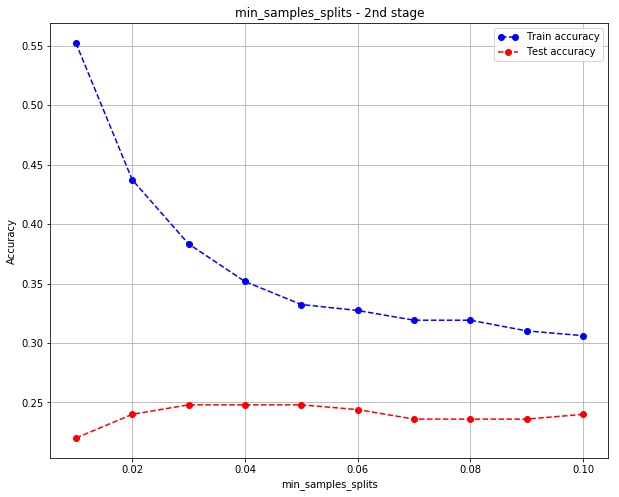

In [19]:
# tunning min_samples_splits - 2nd stage

start = time.time()

min_samples_splits = np.linspace(0.01, 0.1, 10)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    cifar_model = DecisionTreeClassifier(random_state = 1, min_samples_split = min_samples_split)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

end = time.time()
print(f"time spent: {end - start}")

line1, = plt.plot(min_samples_splits, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(min_samples_splits, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.grid(True)
plt.title('min_samples_splits - 2nd stage')
plt.show()

time spent: 48.72993803024292


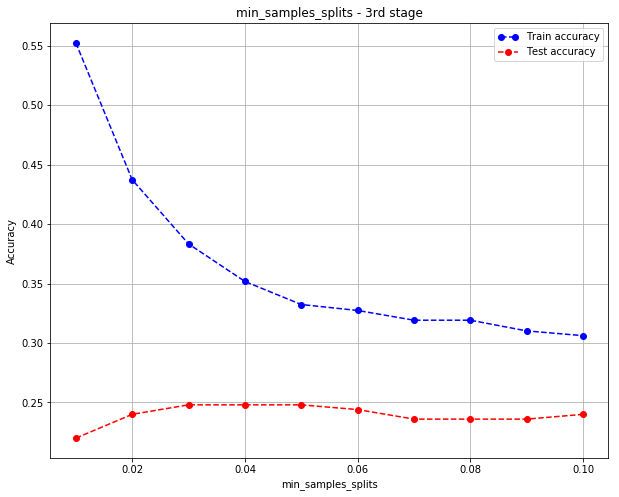

In [20]:
# tunning min_samples_splits - 3rd stage

start = time.time()

min_samples_splits = np.linspace(0.01, 0.1, 10)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    cifar_model = DecisionTreeClassifier(random_state = 1, min_samples_split = min_samples_split)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

end = time.time()
print(f"time spent: {end - start}")


line1, = plt.plot(min_samples_splits, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(min_samples_splits, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.grid(True)
plt.title('min_samples_splits - 3rd stage')
plt.show()

time spent: 5.617088079452515


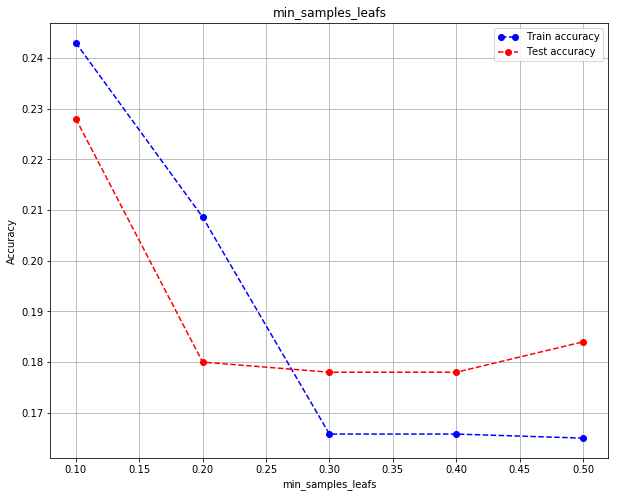

In [21]:
# min_samples_leaf


start = time.time()

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
    
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    cifar_model = DecisionTreeClassifier(random_state = 1, min_samples_leaf = min_samples_leaf)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

end = time.time()
print(f"time spent: {end - start}")
   

line1, = plt.plot(min_samples_leafs, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(min_samples_leafs, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leafs')
plt.grid(True)
plt.title('min_samples_leafs')
plt.show()

time spent: 26.903807401657104


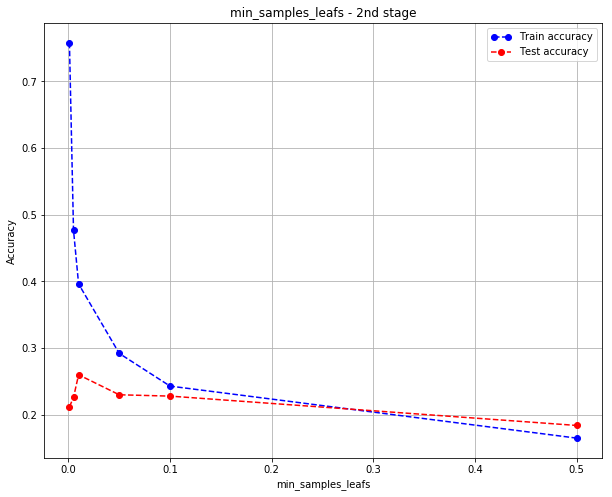

In [22]:
# min_samples_leaf - 2nd stage


start = time.time()

min_samples_leafs = np.array([0.001, 0.005, 0.01, 0.05, 0.1, 0.5])   
    
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    cifar_model = DecisionTreeClassifier(random_state = 1, min_samples_leaf = min_samples_leaf)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

end = time.time()
print(f"time spent: {end - start}")
   

line1, = plt.plot(min_samples_leafs, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(min_samples_leafs, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leafs')
plt.grid(True)
plt.title('min_samples_leafs - 2nd stage')
plt.show()

time spent: 57.159751892089844


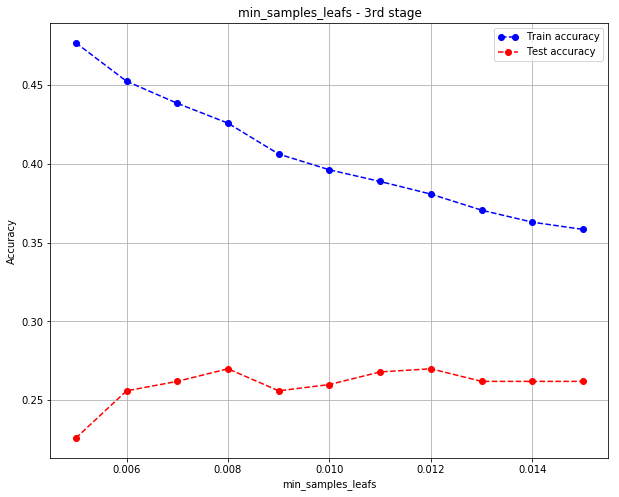

In [23]:
# min_samples_leaf - 3rd stage


start = time.time()

min_samples_leafs = np.linspace(0.005, 0.015, 11)
    
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    cifar_model = DecisionTreeClassifier(random_state = 1, min_samples_leaf = min_samples_leaf)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

end = time.time()
print(f"time spent: {end - start}")
   

line1, = plt.plot(min_samples_leafs, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(min_samples_leafs, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leafs')
plt.grid(True)
plt.title('min_samples_leafs - 3rd stage')
plt.show()

time spent: 11.326541900634766


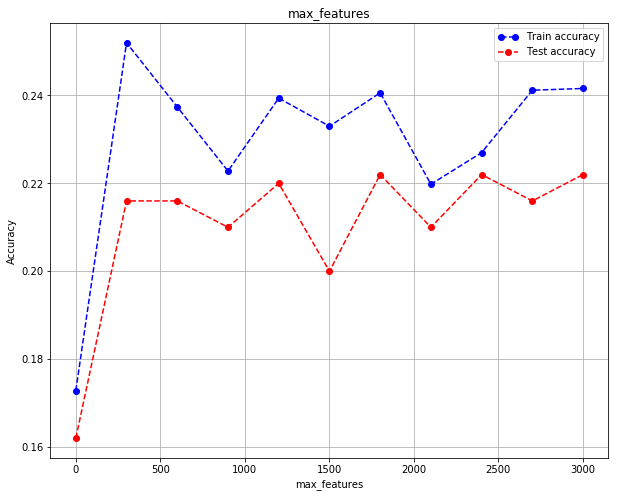

In [24]:
# max_features

start = time.time()

max_features = np.arange(1,X_train.shape[1],300)    
    
train_results = []
test_results = []

for max_feature in max_features:
    cifar_model = DecisionTreeClassifier(random_state = 1, max_features = max_feature, min_samples_leaf = 0.12)
    cifar_model.fit(X_train, y_train)
    y_train_pred = cifar_model.predict(X_train)
    y_test_pred = cifar_model.predict(X_test)
    
    train_accuracy = float(np.sum(y_train_pred == y_train))/num_training
    test_accuracy = float(np.sum(y_test_pred == y_test))/num_test
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

end = time.time()
print(f"time spent: {end - start}")
       

line1, = plt.plot(max_features, train_results, 'bo', label="Train accuracy", linestyle='dashed')
line2, = plt.plot(max_features, test_results, 'ro', label="Test accuracy", linestyle='dashed')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max_features')
plt.grid(True)
plt.title('max_features')
plt.show()
    